In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset

iris_data=pd.read_excel(r"C:\Users\hp\Downloads\iris (2).xls")
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.shape

(150, 5)

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [6]:
iris_data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# checking for null values

iris_data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

### Inference
There are null values in the dataset

In [8]:
# filling the null values using mean of each feature columns


iris_data['SL']=iris_data['SL'].fillna(iris_data['SL'].mean())
iris_data['SW']=iris_data['SW'].fillna(iris_data['SW'].mean())
iris_data['PL']=iris_data['PL'].fillna(iris_data['PL'].mean())


In [9]:
iris_data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

####  Now there are no null values in the dataset

<AxesSubplot:xlabel='Classification', ylabel='count'>

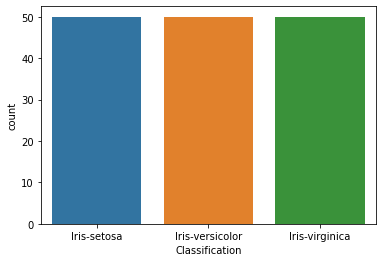

In [10]:
sns.countplot(iris_data['Classification'])

<AxesSubplot:>

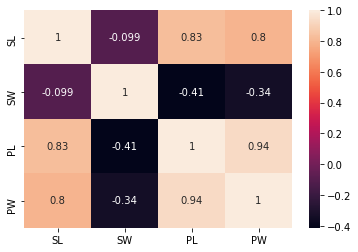

In [11]:
sns.heatmap(iris_data.corr(),annot=True)

<AxesSubplot:>

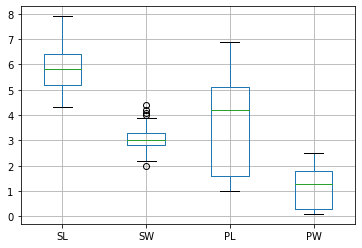

In [12]:
#sns.boxplot(iris_data['SW'])
#sns.boxplot(iris_data['SL'])
iris_data.boxplot()

<AxesSubplot:xlabel='SW'>

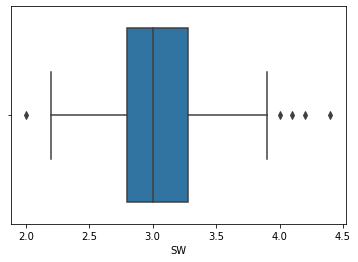

In [13]:
sns.boxplot(iris_data['SW'])

## Inference
 There are outliers in the dataset.
Since the data is relevant we can keep the outliers.

In [14]:
# Splitting the dataset into training dataset and testing dataset


from sklearn.model_selection import train_test_split

In [15]:
x=iris_data.drop('Classification',axis=1)  # independent features
y=iris_data['Classification']  #  target feature

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x_train.shape

(120, 4)

In [18]:
y_train.shape

(120,)

In [19]:
y_test.value_counts()

Iris-virginica     11
Iris-setosa        10
Iris-versicolor     9
Name: Classification, dtype: int64

In [20]:
x_test.shape

(30, 4)

In [21]:
y_test.shape

(30,)


## Decision Tree Classifier


In [22]:
# Importing model
from sklearn.tree import DecisionTreeClassifier

# Importing the evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
dc=DecisionTreeClassifier() # Creating an instance
dc.fit(x_train,y_train) # training the model
y_pred_dc=dc.predict(x_test) # predicting using the model

In [24]:
confusion_matrix(y_test,y_pred_dc)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

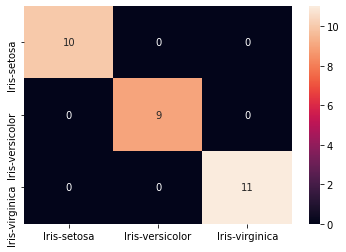

In [25]:
sns.heatmap(confusion_matrix(y_test,y_pred_dc),annot=True,xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])


In [26]:
print(classification_report(y_test,y_pred_dc))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Inference 
Decision Tree Classifier gives a 100 percent accuarate classification model for the given data.

## KNeighborsClassifier

In [27]:
# importing Classification model

from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn=KNeighborsClassifier() # creating an instance
knn.fit(x_train,y_train) # training using the data
y_pred_knn=knn.predict(x_test) # predicting using the model

In [29]:
confusion_matrix(y_test,y_pred_knn)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

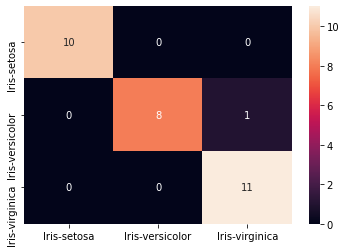

In [30]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True,xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])


In [31]:
print(classification_report(y_test,y_pred_knn))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



### Inference:
KNeighbors classifier does not give an absolutely accurate model since f1-score for Iris_versicolor is 0.94 
and for Iris Virginica is 0.96 comparing to the other models used so far.

### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf=RandomForestClassifier() # creating an instance
rf.fit(x_train,y_train) # fiting using the model
y_pred_rf=rf.predict(x_test) # predicting using Random Forest Classifier

In [34]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [35]:
print(classification_report(y_test,y_pred_rf))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### Inference:
Random Forest Classifier gives a 100 percent accurate classification model with f1-score equal to 1.

## Support Vector Machine

In [36]:
from sklearn.svm import SVC

In [37]:
svc=SVC(kernel='rbf') # Creating an instance
svc.fit(x_train,y_train) # Fitting the data
y_pred_svc=svc.predict(x_test) # predicting the data

In [38]:
confusion_matrix(y_test,y_pred_svc)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [39]:
print(classification_report(y_test,y_pred_svc))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Inference:
Support vector also gives a 100 percent accurate classification model for the given iris data.

### Of all the classification algorithms used SVM, Decision Tree and Random Forest gives 100 percent accurate classification model for the given data.